<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png"
     width="200px"
     height="auto"/>
</p>



# <h1 align="center" id="heading">Phase I - Proof of Concept</h1>



## ☑️ Objectives
At the end of this session, you will have a brief understanding of how to:
- [ ] Find and run pre-trained models (Phase I)
- [ ] Evaluate results from pre-trained models (Phase I)
- [ ] Run a pre-trained model using real Reddit data (Phase I)


## 🛠️ Pre-Assignment
1. Create a virtual environment with 🐍 conda : `conda env create -f environment.yml`

2. Activate your conda virtual environment: `conda activate tsla_bot`

3. Create a .env file in the root directory and add the following variables:
4. 
   `STOCK_API_KEY` : API key from [twelvedata](https://twelvedata.com/pricing)

   `REDDIT_API_CLIENT_ID` : client ID of your reddit app
   
   `REDDIT_API_CLIENT_SECRET`: client secret of your reddit app
   
   Follow this tutorial to generate your own Reddit credentials:
   <https://www.jcchouinard.com/get-reddit-api-credentials-with-praw/>

4. Continue in this notebook



## Background


After the meeting with your boss, and reviewing your [notes](https://www.notion.so/Analyzing-Market-Sentiment-Phase-I-II-and-II-End-to-End-MLOps-with-Open-Source-Tools-dc4b846108b44f6bb2962d550368560c#54cc350bc95041ee873dabde36930af1) 📓, you're ready to get going on a Proof of Concept (POC)

A POC tests the validity of your hypothesis. It's a way to prove that your idea, task, app, or whatever else works!

There's no time to waste - you've got an idea - it's time to get testing it out! 🏁

### Step 1: Initial Imports and Variable Setting 📈

First things first: Let's set some variables that will help us going forward.

Though your boss suggested `"TSLA"`, you can use any active stock-symbol and subreddit!

**IMPORTANT**: Make sure you verify that your selected subreddit exists by navigating to the generated link after you run the following cell

In [6]:
from datetime import datetime, timedelta

### START CODE HERE

# Stock data to grab ex. "TSLA"
symbol = "TSLA"

# subreddit to check
#subreddit = "stocks"
subreddit = "teslainvestorsclub"

# Time interval granularity
# valid choices are "1week", "1month", "1day"
interval = "1month"

# set the beginning and end of the time range you'd like to analyze
# ensure you use the format "YYYY-MM-DD"
start_date = "2022-01-01"
end_date =  "2022-06-30"

### END CODE HERE

start_date_dt = datetime.strptime(start_date, '%Y-%m-%d')
end_date_dt = datetime.strptime(end_date, '%Y-%m-%d')

print(f'reddit.com/r/{subreddit}')

reddit.com/r/teslainvestorsclub


In order to make sure we can import our `BotUtils.py`, we have to ensure we're running from the `TSLASentimentAnalyzer` folder. To do this, we can `cd` into that directory!

In [2]:
cd TSLASentimentAnalyzer

/Users/oshadakasun/Tech/FourthBrain/MLOps Intro/code/MLOps-repo/Week_1-Open_Source_ML_POC_and_App_Builds/Phase_I-Proof_of_concept/TSLASentimentAnalyzer


### Step 2: Set Environment Variables ⛰️

Use the information you created in the instructions of the `README.md` to fill in the values below!

In [3]:
# define env variables for configuration
import os
print(os.getenv("REDDIT_API_CLIENT_ID"))
os.environ['REDDIT_API_CLIENT_ID'] = os.getenv("REDDIT_API_CLIENT_ID")
os.environ['REDDIT_API_CLIENT_SECRET'] = os.getenv("REDDIT_API_CLIENT_SECRET")
os.environ['STOCK_DATA_API_KEY'] = os.getenv("STOCK_API_KEY")

O1x7LQC_-FhRdauxcspt4A


### Step 3: Get to Scraping 🌐

Now we're going to use the `scraper` module (found in the `TSLASentimentAnalyzer` folder) to "scrape" the subreddit of our choosing for posts!

⚗️ RESOURCES: 

[Web Scraping](https://www.parsehub.com/blog/what-is-web-scraping/)

[Reddit Post Options](https://www.reddit.com/r/help/comments/32eu8w/what_is_the_difference_between_newrising_hot_top/)

##### Initializing the Scraper

In [7]:
import pandas as pd
from loguru import logger
from TSLASentimentAnalyzer.classifier import predict
from TSLASentimentAnalyzer.scraper import RedditScraper
from TSLASentimentAnalyzer.config import settings

# instantiating the reddit scraper
reddit = RedditScraper(subreddit)### YOUR LINE OF CODE HERE

##### Helper Functions 🔨

Here are some helper functions to assist in collecting data!

In [8]:
from collections.abc import Callable

def load_comments(number: int, scraping_option: Callable) -> pd.DataFrame:
    '''
    loads comments from reddit using the RedditScraper using one of the options
    and returns a DataFrame

    Parameters
    ----------
    number : int
        number of posts to load comments from

    scraping_options: callable
        expects a select_scrap_type function
    '''
    comments = []
    for submission in scraping_option(number):
        comments.extend(reddit.get_comment_forest(submission.comments))
        logger.debug(
            submission.title,
            submission.num_comments,
            len(reddit.get_comment_forest(submission.comments)),
        )
    df = pd.DataFrame(comments)
    return df


def select_scrap_type(option: str) -> Callable:
    '''
    selects a method from the reddit object based on a given option
    '''
    if option == "Hot":
        return reddit.get_hot
        
    if option == "Rising":
        return reddit.get_rising

    if option == "New":
        return reddit.get_new

##### Loading & Processing the Reddit Comment Data

Let's scrape the 15 🔥 hottest 🔥 posts from your selected subreddit using the `load_comments()` helper function!

In [9]:
# Scraping data from reddit
dfReddit = load_comments(15,select_scrap_type("Hot"))### YOUR LINE OF CODE HERE

2022-07-10 06:56:53.446 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x1051e58e0>
2022-07-10 06:56:53.447 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x1051e58e0>
2022-07-10 06:56:53.448 | DEBUG    | __main__:load_comments:19 - Daily Thread - July 09, 2022
2022-07-10 06:56:57.183 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x28379e5e0>
2022-07-10 06:56:57.184 | INFO     | TSLASentimentAnalyzer.scraper:get_comment_forest:44 - more comments
2022-07-10 06:56:57.636 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <MoreComments count=1, children=['i7h9jhn']>
2022-07-10 06:56:57.637 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:45 - [{'comment': "Walked right into that one, no?  Where, precisely, was the government impeding anyone's spee

Once we have our comments, let's use the [`pandas.Series.str.slice()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.slice.html) method to ensure our data will play nicely with our model. (`bert` only supports up to a maximum of 512 tokens, so a range of `0` to `512` seems appropriate)

In [15]:
dfReddit

,comment,title,id,created_at,score
0,Alright ! Italy here I come 😀. Finished workin...,"Daily Thread - July 09, 2022",ifgcamx,1657356780,12
1,Apparently /r/WallStreetBets is now an officia...,"Daily Thread - July 09, 2022",ifipat3,1657401032,12
2,According to my local online retailer the chip...,"Daily Thread - July 09, 2022",ifgee3x,1657358557,10
3,"Another week passes, another week where Elon s...","Daily Thread - July 09, 2022",ifihmlo,1657397589,11
4,June China / MY dominating even vs much cheape...,"Daily Thread - July 09, 2022",ifiv959,1657403757,9
...,...,...,...,...,...
1055,"At that rate, 948,000/year","Tesla China June Sales 78,906 Wholesale 968 Ex...",ifc1gme,1657282152,8
1056,Tesla China June data:\nExport: 968\nWholesale...,"Tesla China June Sales 78,906 Wholesale 968 Ex...",ifbmyim,1657271922,2
1057,And that’s without the planned upgrades soon,"Tesla China June Sales 78,906 Wholesale 968 Ex...",ifc50fe,1657284060,6
1058,It's not production. Monthly deliveries at the...,"Tesla China June Sales 78,906 Wholesale 968 Ex...",ifc9fbf,1657286240,2


In [16]:
# slice comments as bert supports only 512 tokens
dfReddit['comment'] = dfReddit['comment'] .str.slice(start=0, stop=512, step=1) ### YOUR LINE OF CODE HERE

### Step 5: Analyze the Comments! 🔍


We'll be using the `FourthBrain/bert_model_reddit_tsla` model (found [here](https://huggingface.co/FourthBrain/bert_model_reddit_tsla)), which is based off of the `distilbert-base-uncased` (found [here](https://huggingface.co/distilbert-base-uncased))

We'll use this model in a `sentiment-analysis` pipeline! (read all about that [here](https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.pipeline.example))

In [17]:
from transformers import pipeline

# initialize the sentiment pipeline
sentiment_pipeline = pipeline("sentiment-analysis",model="FourthBrain/bert_model_reddit_tsla")### YOUR LINE OF CODE HERE


reddit_json = sentiment_pipeline(dfReddit["comment"].tolist())

# Retrieve labels and scores
dfReddit['label'] = [reddit_json[i]['label'] for i in range(0, len(reddit_json))]
dfReddit['score'] = [reddit_json[i]['score'] for i in range(0, len(reddit_json))]


Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/360 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/695k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Next up, we'll want to perform the following steps

1. Convert the `created_at` column to the appropriate format and name it `'timestamp'`
2. Normalize the dates using the `NormalizeDates()` helper function

In [18]:
import numpy as np
from BotUtils import NormalizeDates

# Rename timestamp column 
dfReddit = dfReddit.rename(columns={'created_at': 'timestamp'})
dfReddit['timestamp'] = [datetime.fromtimestamp(dt) for dt in dfReddit['timestamp'] ]

# Normalize Reddit sentiment data
dfReddit = NormalizeDates(dfReddit, timestamp_col="timestamp", interval=interval)

# Create a continous time series 
dfTimeSeries = pd.DataFrame(dfReddit["timestamp"])

### Step 6: Get Stock Data 🚀

Next up, we're going to get the stock data and create a DataFrame - as well as normalize the dates, just like we did with the subreddit comment timestamps

In [19]:
from BotUtils import GetStockData

# Get Stock Data
j, dfStockData = GetStockData(settings.stock_data_api_key, symbol=symbol, start_date=start_date, end_date=end_date, interval='1day')
dfStockData = dfStockData[(dfStockData['timestamp'] >= start_date) & (dfStockData['timestamp'] <= end_date)]

# Normalize stock price data
dfStockData = NormalizeDates(dfStockData, timestamp_col="timestamp", interval=interval)

### Step 7: Merge Sentiment and Stock Data 🧬

We've got some processing to do! 

In [20]:
# Join time series df with stock price df and reddit df
dfSentiment = dfTimeSeries.merge(dfStockData, how='left', on="timestamp")
dfSentiment = dfSentiment.merge(dfReddit, how='left', on="timestamp")

# Filter down to only the columns that we'll be using 
dfSentiment = dfSentiment[['timestamp', 'close', 'volume', 'label', 'score']]

# Clean up NaNs for closing price, score, and labels
dfSentiment['close'] = dfSentiment['close'].fillna(0)
dfSentiment['score'] = dfSentiment['score'].fillna(0)
dfSentiment['label'] = dfSentiment['label'].fillna('NEUTRAL')
dfSentiment['label'] = ['NEGATIVE' for s in dfSentiment['label'] == 'LABEL_0']
dfSentiment['label'] = ['POSITIVE' for s in dfSentiment['label'] == 'LABEL_1']

# Convert close from string to float
dfSentiment['close'] = dfSentiment['close'].astype('float')

# Calculate weighted sentiment
dfSentiment['sentiment'] = [1 if sentiment == "POSITIVE"  else 0 if sentiment == "NEUTRAL" else -1 for sentiment in dfSentiment['label'].tolist() ]
dfSentiment['weighted_sentiment'] = dfSentiment['sentiment'] * dfSentiment['score']

# Count only the POSITIVE and NEGATIVE labels (NEUTRAL is just a filler for missing dates)
dfSentiment['counter'] = [1 if sentiment == "POSITIVE"  else 1 if sentiment == "NEGATIVE" else 0 for sentiment in dfSentiment['label'].tolist() ]

# Group by to calculate Reddit post count and sentiment score (mean of weighted sentiment)
dfSentiment = dfSentiment.groupby('timestamp') \
       .agg({'counter':'sum', 'close':'max', 'volume':max, 'weighted_sentiment':'mean'}) \
       .rename(columns={'sentiment':'count_posts', 'weighted_sentiment':'sentiment_score'}) \
       .reset_index()


In [21]:
dfSentiment

,timestamp,counter,close,volume,sentiment_score
0,2022-02-01,35131,932.00000,45107400,0.890362
1,2022-03-01,325703,1099.56995,40225400,0.870545
2,2022-04-01,208080,1145.44995,45377900,0.844497
3,2022-05-01,382725,952.62000,48324400,0.855616
4,2022-06-01,83349,775.00000,40931000,0.860026
5,2022-07-01,357604,0.00000,NaN,0.881586


### Step 8: Final Computation 🖥️

In this last step, we're going to finish up some calculations:

1. Create the lags and percentage change for the closing stock price. 
2. Calculate the 3 month rolling average.

In [22]:
# Create lags and %change for closing stock price
dfSentiment['close_lag1'] = dfSentiment['close'].shift(1)
dfSentiment['close_lag1'] = dfSentiment['close_lag1'].fillna(0)
dfSentiment['perc_change_close'] = (dfSentiment['close'] - dfSentiment['close_lag1']) / dfSentiment['close_lag1']
dfSentiment['perc_change_close'] = dfSentiment['perc_change_close'].fillna(0)

dfSentiment['sentiment_score_lag1'] = dfSentiment['sentiment_score'].shift(1)
dfSentiment['sentiment_score_lag1'] = dfSentiment['sentiment_score_lag1'].fillna(0)
dfSentiment['perc_change_sentiment'] = (dfSentiment['sentiment_score'] - dfSentiment['sentiment_score_lag1']) / dfSentiment['sentiment_score_lag1']

# Calculate 3 month rolling average
dfSentiment['sentiment_SMA3mo'] = dfSentiment.sentiment_score.rolling(3).mean()
dfSentiment['sentiment_SMA3mo'] = dfSentiment['sentiment_SMA3mo'].fillna(0)

dfSentiment = dfSentiment[1:]
dfSentiment

,timestamp,counter,close,volume,sentiment_score,close_lag1,perc_change_close,sentiment_score_lag1,perc_change_sentiment,sentiment_SMA3mo
1,2022-03-01,325703,1099.56995,40225400,0.870545,932.00000,0.179796,0.890362,-0.022256,0.000000
2,2022-04-01,208080,1145.44995,45377900,0.844497,1099.56995,0.041725,0.870545,-0.029922,0.868468
3,2022-05-01,382725,952.62000,48324400,0.855616,1145.44995,-0.168344,0.844497,0.013167,0.856886
4,2022-06-01,83349,775.00000,40931000,0.860026,952.62000,-0.186454,0.855616,0.005154,0.853380
5,2022-07-01,357604,0.00000,NaN,0.881586,775.00000,-1.000000,0.860026,0.025069,0.865743


Let's save our work in a `.csv` for use later in the Streamlit app!

In [23]:
# Save DataFrame locally (or somewhere else) for use in Streamlit app
dfSentiment.to_csv('./sentiment_data.csv')

### Step 8a: Plotting our Results! 📊

Now, after all that, let's plot our results and see how they shape up!

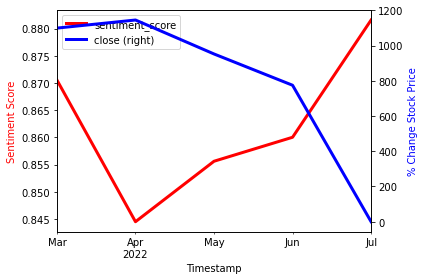

In [24]:
import matplotlib.pyplot as plt

ax1 = dfSentiment.plot(kind = 'line', x = 'timestamp',
                  y = 'sentiment_score', color = 'Red',
                  linewidth = 3)

ax2 = dfSentiment.plot(kind = 'line', x = 'timestamp',
                   y = 'close', secondary_y = True,
                   color = 'Blue',  linewidth = 3,
                   ax = ax1) 

#labeling x and y-axis
ax1.set_xlabel('Timestamp', color = 'black')
ax1.set_ylabel('Sentiment Score', color = "r")
ax2.set_ylabel('% Change Stock Price', color = 'b')
 
#defining display layout
plt.tight_layout()
 
#show plot
plt.show()